## Multilayer Perceptrons

Two standard neural network estimators defined in `scikit-learn` are `MLPClassifier` and `MLPRegressor`.

* http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
* http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

We'll demonstrate how to use both. 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np;
import pandas as pd
import sklearn.metrics as metrics

## Classification

### Read in a data set

We'll again use the Wisconsin breast cancer data set. The target is binary: 0 (M) and 1 (B).

In [2]:
# Read in a data set using Pandas. 
wdbc_data = '../data-sets/wdbc.csv'
df = pd.read_csv(wdbc_data, header=0)
print("shape:\t",df.shape)
df.head()

shape:	 (569, 32)


,id,radiusAvg,textureAvg,perimeterAvg,areaAvg,smoothnessAvg,compactnessAvg,concavityAvg,concavepointsAvg,symmetryAvg,...,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavepointsWorst,symmetryWorst,fractaldimWorst,c
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Scaling the data

Neural networks are sensitive to scaling, and so we scale the data (in this case using a min-max scaler). We then create a training testing split of the data.

In [3]:
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import MinMaxScaler

data = df.iloc[:].values

test_percent = 0.3

# extract X and y values from the data set; 
X = data[:, 1:-1]
y = data[:, -1]

# use a min max scaler to put the features in [0,1]
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)            

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_percent, shuffle=True)

print("Training set size:", len(y_train))
print("Testing set size:", len(y_test))
print("Input attributes:",X.shape[1])

Training set size: 398
Testing set size: 171
Input attributes: 30


In this dataset, `B` is 1 and `M` is 0. 

## Creating an `MLPClassifier`

Below we create three different classifiers, each based on a different learning algorithm (`lbfgs`, `sdg`, `adam`), including stochastic gradient descent. We also specify that the learning rate is constant.

In general, there are many parameters that can be set for the neural network (importantly, the number of hidden layers and the number of nodes in each). We've left the defaults in place, but understand that these values can wildly affect the final results. 

We've set the maximum number of iteratios (epochs) to 5000. In some cases, the network will fail to converge (this will generate a warning message). 

In [4]:
from sklearn.neural_network import MLPClassifier

clf1 = MLPClassifier(solver='lbfgs',max_iter=5000,activation='logistic', learning_rate  = 'constant')
clf2 = MLPClassifier(solver='sgd',max_iter=5000, learning_rate  = 'constant')
clf3 = MLPClassifier(solver='adam',max_iter=5000, learning_rate  = 'constant')

for clf in [clf1,clf2,clf3]:
    clf.fit(X_train, y_train)                         
    predicted= np.array(clf.predict(X_test))
    cm = metrics.confusion_matrix(y_test, predicted,labels=[1,0])
    print("","B","M",sep="\t")
    print("B",cm[0,0],cm[0,1],sep="\t" )
    print("M",cm[1,0],cm[1,1],sep="\t" )
    print('-'*20)
    print("accuracy:", metrics.accuracy_score(predicted,y_test))   

	B	M
B	98	2
M	2	69
--------------------
accuracy: 0.9766081871345029
	B	M
B	98	2
M	3	68
--------------------
accuracy: 0.9707602339181286
	B	M
B	98	2
M	3	68
--------------------
accuracy: 0.9707602339181286


Below, we examine which instances the first classifier got incorrect. 

In [5]:
for pred,yact in zip(clf1.predict(X_test),y_test):
    s = ""
    if not pred==yact:
        s = "X"
    print(pred,yact, s)

0.0 0.0 
0.0 0.0 
0.0 0.0 
1.0 1.0 
0.0 0.0 
0.0 0.0 
1.0 1.0 
0.0 0.0 
1.0 1.0 
0.0 0.0 
1.0 1.0 
1.0 1.0 
1.0 1.0 
0.0 0.0 
1.0 1.0 
0.0 0.0 
1.0 1.0 
1.0 1.0 
0.0 0.0 
1.0 1.0 
0.0 0.0 
1.0 1.0 
1.0 1.0 
1.0 1.0 
1.0 1.0 
1.0 1.0 
1.0 1.0 
0.0 0.0 
1.0 1.0 
0.0 0.0 
1.0 1.0 
1.0 1.0 
1.0 1.0 
1.0 1.0 
0.0 0.0 
1.0 1.0 
0.0 0.0 
0.0 0.0 
0.0 0.0 
1.0 1.0 
1.0 1.0 
1.0 1.0 
1.0 1.0 
1.0 1.0 
0.0 0.0 
1.0 1.0 
1.0 1.0 
0.0 0.0 
1.0 1.0 
0.0 0.0 
1.0 1.0 
0.0 0.0 
0.0 0.0 
0.0 0.0 
1.0 1.0 
1.0 1.0 
1.0 1.0 
1.0 1.0 
0.0 0.0 
0.0 0.0 
1.0 1.0 
1.0 1.0 
1.0 1.0 
0.0 0.0 
1.0 1.0 
1.0 1.0 
1.0 1.0 
1.0 1.0 
0.0 1.0 X
1.0 1.0 
0.0 0.0 
0.0 0.0 
1.0 1.0 
0.0 0.0 
1.0 1.0 
1.0 1.0 
1.0 1.0 
0.0 0.0 
1.0 1.0 
1.0 1.0 
1.0 0.0 X
0.0 0.0 
1.0 1.0 
1.0 1.0 
0.0 0.0 
1.0 1.0 
1.0 1.0 
0.0 0.0 
1.0 1.0 
0.0 0.0 
0.0 0.0 
1.0 1.0 
1.0 1.0 
0.0 0.0 
1.0 1.0 
0.0 0.0 
0.0 0.0 
0.0 0.0 
1.0 1.0 
0.0 0.0 
0.0 0.0 
1.0 1.0 
0.0 0.0 
1.0 1.0 
1.0 1.0 
0.0 0.0 
0.0 0.0 
1.0 1.0 
1.0 1.0 
1.0 1.0 
1.0 1.0 

#### Probabilities

It's also possible to output probabilities using `predict_proba`.

In [6]:
for pred, pred_class, yact in zip(clf1.predict_proba(X_test),clf1.predict(X_test), y_test):
    s = ""
    if not pred_class==yact:
        s = "X"    
    print(f"{pred_class}\t|{pred[0]:.3f}\t{pred[1]:.3f}|\t{yact}\t{s}")

0.0	|1.000	0.000|	0.0	
0.0	|1.000	0.000|	0.0	
0.0	|1.000	0.000|	0.0	
1.0	|0.000	1.000|	1.0	
0.0	|1.000	0.000|	0.0	
0.0	|1.000	0.000|	0.0	
1.0	|0.000	1.000|	1.0	
0.0	|1.000	0.000|	0.0	
1.0	|0.000	1.000|	1.0	
0.0	|0.992	0.008|	0.0	
1.0	|0.001	0.999|	1.0	
1.0	|0.000	1.000|	1.0	
1.0	|0.000	1.000|	1.0	
0.0	|1.000	0.000|	0.0	
1.0	|0.000	1.000|	1.0	
0.0	|1.000	0.000|	0.0	
1.0	|0.000	1.000|	1.0	
1.0	|0.000	1.000|	1.0	
0.0	|1.000	0.000|	0.0	
1.0	|0.000	1.000|	1.0	
0.0	|1.000	0.000|	0.0	
1.0	|0.000	1.000|	1.0	
1.0	|0.000	1.000|	1.0	
1.0	|0.000	1.000|	1.0	
1.0	|0.000	1.000|	1.0	
1.0	|0.000	1.000|	1.0	
1.0	|0.000	1.000|	1.0	
0.0	|1.000	0.000|	0.0	
1.0	|0.000	1.000|	1.0	
0.0	|1.000	0.000|	0.0	
1.0	|0.000	1.000|	1.0	
1.0	|0.000	1.000|	1.0	
1.0	|0.000	1.000|	1.0	
1.0	|0.000	1.000|	1.0	
0.0	|1.000	0.000|	0.0	
1.0	|0.000	1.000|	1.0	
0.0	|1.000	0.000|	0.0	
0.0	|1.000	0.000|	0.0	
0.0	|1.000	0.000|	0.0	
1.0	|0.000	1.000|	1.0	
1.0	|0.245	0.755|	1.0	
1.0	|0.000	1.000|	1.0	
1.0	|0.000	1.000|	1.0	
1.0	|0.000	

## Hidden Layers

By default, a single hidden layer of 100 nodes is used. Other architectures can be specified using `hidden_layer_sizes`. E.g., `hidden_layer_sizes=(60, 30)`.

We can gain access to the coefficients of the edges, including those due to bias nodes, using `coefs_` and `intercepts_`, respectively. `coefs_` is a list of coefficient matrices. The first element of the list contains all of weights for edges from the input nodes to the first hidden layer. 

In [7]:
# shape of coefficient arrays, by layer; 
for c in clf1.coefs_:
    print("layer:", c.shape)
    
# bias node coefficients
for b in clf1.intercepts_:
    print("bias,layer:", b.shape)
    
print(clf1.intercepts_)

layer: (30, 100)
layer: (100, 1)
bias,layer: (100,)
bias,layer: (1,)
[array([ 5.55732722e-01, -1.86291089e+00, -7.40773677e-01, -1.40741144e+00,
        3.92775351e+00,  1.84177935e-01, -2.27588988e+00,  1.13133656e+00,
        2.10994809e-02, -3.28884477e+00,  3.90780066e-01, -4.16553872e-01,
       -5.92917996e-01, -6.19594596e-01,  8.17678671e-01,  1.93641559e+00,
        9.59328352e-02,  2.16567048e+00, -1.39443028e+00,  3.52184437e+00,
        1.82742490e-01, -2.74407875e-01, -6.00911393e-01, -3.55036345e-01,
        1.70782032e-01,  4.22614640e-01, -3.13074786e-01,  9.98684192e-01,
       -2.14849938e+00, -1.12935592e+00,  2.40971967e-01, -5.58628482e-01,
       -2.01594718e+00, -4.90632372e-01, -1.12171924e-02,  5.80011559e-01,
        1.25983538e-01,  1.00224592e+00,  5.11345490e+00,  4.55162799e-01,
       -1.11989294e+00, -1.75085479e-01,  1.32536149e-01, -7.34204698e-02,
       -1.05832467e+00,  2.20146077e-01,  8.43884766e-03,  2.24236005e-02,
        6.63696477e+00,  4.064

Below, we create anothe network with  2 hidden layers. 

In [8]:
clf4 = MLPClassifier(solver='sgd',max_iter=5000, learning_rate  = 'constant', hidden_layer_sizes=(60,30))
clf4.fit(X_train, y_train)                         
predicted= np.array(clf4.predict(X_test))
cm = metrics.confusion_matrix(y_test, predicted,labels=[1,0])
print("","B","M",sep="\t")
print("B",cm[0,0],cm[0,1],sep="\t" )
print("M",cm[1,0],cm[1,1],sep="\t" )
print('-'*80)
print("accuracy:", metrics.accuracy_score(predicted,y_test))   
print('-'*80)
# shape of coefficient arrays, by layer; 
for c in clf4.coefs_:
    print("layer:", c.shape)
print('-'*80)    
# bias node coefficients
for b in clf4.intercepts_:
    print("bias,layer:", b.shape)
    

	B	M
B	98	2
M	1	70
--------------------------------------------------------------------------------
accuracy: 0.9824561403508771
--------------------------------------------------------------------------------
layer: (30, 60)
layer: (60, 30)
layer: (30, 1)
--------------------------------------------------------------------------------
bias,layer: (60,)
bias,layer: (30,)
bias,layer: (1,)


## Grid search

To search for ideal parameters, we can use a grid search, which makes use of a dictionary of parameters and allowable values. 

In [9]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'solver' : ['lbfgs','sgd','adam'],
    'activation' : ['identity', 'logistic', 'tanh', 'relu']
    }
    
clf = MLPClassifier(max_iter=1000, learning_rate  = 'constant', random_state=1)
grid = GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=-1, cv = 3)
grid_result = grid.fit(X, y)

print("best score: %f %s" % (grid_result.best_score_, grid_result.best_params_))
print('-'*80)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("{:.4f}\t{}".format(mean, param))

best score: 0.975401 {'activation': 'logistic', 'solver': 'adam'}
--------------------------------------------------------------------------------
0.9491	{'activation': 'identity', 'solver': 'lbfgs'}
0.9455	{'activation': 'identity', 'solver': 'sgd'}
0.9719	{'activation': 'identity', 'solver': 'adam'}
0.9578	{'activation': 'logistic', 'solver': 'lbfgs'}
0.6274	{'activation': 'logistic', 'solver': 'sgd'}
0.9754	{'activation': 'logistic', 'solver': 'adam'}
0.9596	{'activation': 'tanh', 'solver': 'lbfgs'}
0.9455	{'activation': 'tanh', 'solver': 'sgd'}
0.9719	{'activation': 'tanh', 'solver': 'adam'}
0.9649	{'activation': 'relu', 'solver': 'lbfgs'}
0.9403	{'activation': 'relu', 'solver': 'sgd'}
0.9754	{'activation': 'relu', 'solver': 'adam'}


## Multiclass classification

It is possible to use `MLPClassifier` in multiclass classification problems. Below, we use the Iris data set, which consists of 3 classes.  

In [10]:
from sklearn import datasets
iris = datasets.load_iris()
iris_x = iris.data
iris_y = iris.target
X_train, X_test, y_train, y_test =  train_test_split(iris_x, iris_y, test_size=test_percent, shuffle=True)

iris_mlp = MLPClassifier(max_iter=1000)
iris_mlp.fit(X_train, y_train) 
iris_mlp.predict(X_test)

for p,c, a in zip(iris_mlp.predict_proba(X_test),iris_mlp.predict(X_test),y_test):
    print("{}=={}\t[{}]\t{}\t0={:0.5}\t1={:0.2}\t2={:0.2}\t{:.2f}".format(a,np.argmax(p), c,a == np.argmax(p),p[0],p[1],p[2],np.sum(p)))
    
print('-'*80)   
# shape of coefficient arrays, by layer; 
for c in iris_mlp.coefs_:
    print("layer:", c.shape)
print('-'*80)    
# bias node coefficients
for b in iris_mlp.intercepts_:
    print("bias,layer:", b.shape)

2==2	[2]	True	0=1.0326e-06	1=0.0023	2=1.0	1.00
1==1	[1]	True	0=0.00077084	1=0.99	2=0.011	1.00
0==0	[0]	True	0=0.99973	1=0.00027	2=1.1e-11	1.00
2==2	[2]	True	0=1.202e-05	1=0.013	2=0.99	1.00
0==0	[0]	True	0=0.99998	1=2.3e-05	2=1.3e-13	1.00
2==2	[2]	True	0=4.3226e-06	1=0.0076	2=0.99	1.00
1==1	[1]	True	0=0.0015509	1=0.99	2=0.0054	1.00
1==1	[1]	True	0=0.0010816	1=1.0	2=0.0024	1.00
1==1	[1]	True	0=0.00083857	1=0.95	2=0.047	1.00
1==1	[1]	True	0=0.0015024	1=0.96	2=0.04	1.00
1==1	[1]	True	0=0.0013455	1=1.0	2=0.0023	1.00
0==0	[0]	True	0=0.99926	1=0.00074	2=7e-11	1.00
0==0	[0]	True	0=0.99986	1=0.00014	2=3.1e-12	1.00
2==2	[2]	True	0=1.7693e-06	1=0.011	2=0.99	1.00
2==2	[2]	True	0=2.6623e-05	1=0.065	2=0.93	1.00
2==2	[2]	True	0=6.359e-06	1=0.016	2=0.98	1.00
0==0	[0]	True	0=0.99909	1=0.00091	2=1.2e-10	1.00
1==1	[1]	True	0=0.0016301	1=0.99	2=0.0071	1.00
0==0	[0]	True	0=0.99989	1=0.00011	2=2.8e-12	1.00
2==2	[2]	True	0=3.0921e-06	1=0.0044	2=1.0	1.00
0==0	[0]	True	0=0.99978	1=0.00022	2=9.5e-12	1.00
1==1	[

## Regression

`MLPRegressor` can be used in regression problems. 

Below, we use the builtin Boston housing prices data set. We only use a select number of its input attributes. 

In [11]:
from sklearn.datasets import load_boston
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  mean_squared_error as mse
boston = load_boston()
X = boston.data[:,[0,1,2,4,5,6,7,10,11,12]] 
y = boston.target
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

MIN:  5.0
MAX:  50.0
MEAN:  22.532806324110677
STD:  9.188011545278203


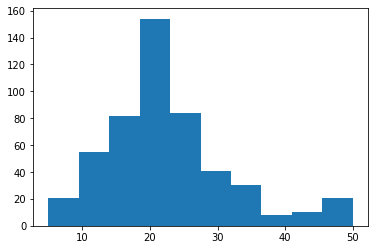

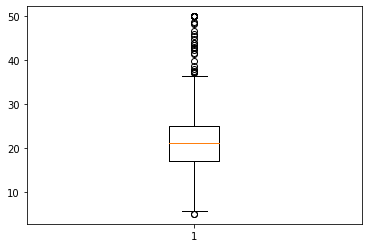

In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt # pyplot is gives a matlab like feel. 
# need the below for presenting plots in Jupyiter notebook. 
%matplotlib inline  
print("MIN: ", np.min(y))
print("MAX: ", np.max(y))
print("MEAN: ", np.mean(y))
print("STD: ", np.std(y))
plt.hist(y)
plt.show()
plt.boxplot(y)
pass

We again scale the data using a min-max scaler, which will put the attribute values in [0,1]. We then compare two models, noe  created with the unscaled data and another created with the scaled data. 

Bewow, use use the mean-squared-error to compare the models. 

In [13]:
Xscaled = min_max_scaler.fit_transform(X)   
cvk = KFold(n_splits=10)
scores = []
for train_indices, test_indices in cvk.split(y):
    reg = MLPRegressor(max_iter=1000)    
    reg.fit(X[train_indices],y[train_indices])
    predicted = reg.predict(X[test_indices])
    reg = MLPRegressor(max_iter=1000)    
    reg.fit(Xscaled[train_indices],y[train_indices])
    predicted2 = reg.predict(Xscaled[test_indices])
    print("mse {:.3f}\t{:.3f}".format(mse(y[test_indices], predicted),mse(y[test_indices], predicted2)))

C:\Users\nimda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mse 14.911	8.332


C:\Users\nimda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mse 16.239	10.483


C:\Users\nimda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mse 6.292	8.402


C:\Users\nimda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mse 36.583	25.806


C:\Users\nimda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mse 33.357	23.960


C:\Users\nimda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mse 35.631	16.366


C:\Users\nimda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mse 20.391	9.953


C:\Users\nimda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mse 93.244	154.123


C:\Users\nimda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mse 70.620	27.553
mse 20.942	13.821


C:\Users\nimda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Below, we split the data into training and testing sets, create a model, and compare the predicted value to the actual. 

mse 11.627
--------------------


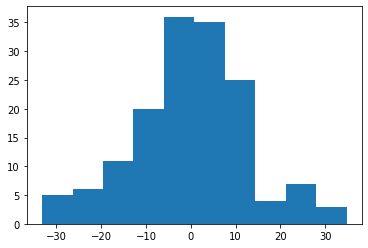

8.6633	5.6000
9.0541	7.2000
12.0416	7.5000
13.5180	8.3000
10.4373	8.8000
14.4149	9.5000
12.0687	10.2000
12.5111	10.4000
3.6964	10.4000
14.0706	10.8000
13.6411	11.0000
13.5484	11.5000
12.4173	12.3000
15.7691	12.5000
12.6301	12.7000
16.1718	12.7000
15.0614	13.0000
16.6585	13.1000
12.2700	13.4000
13.5330	13.4000
11.4362	13.5000
15.6043	13.5000
7.8837	13.8000
9.8243	13.8000
14.6782	14.0000
17.5468	14.1000
17.0656	14.5000
15.3825	14.9000
17.0777	15.3000
13.3853	15.6000
16.8630	15.6000
18.5685	16.1000
16.3000	16.6000
20.0992	16.8000
19.8086	17.1000
18.2970	17.2000
15.0205	17.3000
17.3906	17.6000
18.5894	17.7000
14.1555	17.8000
17.2681	18.0000
17.5815	18.2000
16.3281	18.4000
23.2803	18.5000
18.5445	18.6000
17.0449	18.8000
21.4756	19.0000
14.4757	19.0000
20.6295	19.4000
16.7095	19.4000
21.3628	19.4000
16.9312	19.5000
20.3243	19.6000
17.9672	19.6000
20.4914	19.7000
21.4603	20.0000
16.1703	20.0000
19.8833	20.1000
18.5845	20.1000
19.2018	20.1000
18.6173	20.3000
22.3384	20.4000
21.8709	20.7000
19.

In [16]:
X_train, X_test, y_train, y_test =  train_test_split(Xscaled, y, test_size=test_percent, shuffle=True)

reg = MLPRegressor(max_iter=10000)

reg.fit(X_train, y_train)                         
predicted= np.array(reg.predict(X_test))
print("mse {:.3f}".format(mse(y_test, predicted)))
print('-'*20)

pred = reg.predict(X_test)

y_sorted = np.argsort(y_test)
y_test = y_test[y_sorted]
pred = pred[y_sorted]

plt.hist(y_test-predicted)
plt.show()

err = []
for p,yact in zip(pred, y_test):
    print("{:.4f}\t{:.4f}".format(p,yact))
    v = (p - yact)
    err.append(v*v)
print(np.mean(err))

## Comparison to decision tree

mse 169.925
--------------------


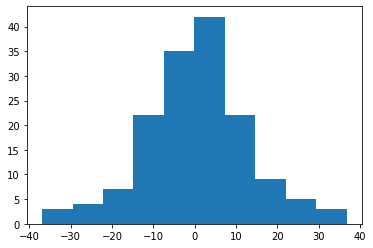

35.2000	5.0000
22.4000	7.0000
20.0000	7.4000
10.2000	8.4000
23.9000	8.4000
11.9000	8.8000
19.2000	10.2000
21.4000	10.5000
12.7000	10.9000
13.0000	12.0000
16.7000	12.6000
16.1000	12.8000
22.4000	13.1000
50.0000	13.1000
19.4000	13.1000
11.9000	13.3000
15.3000	13.5000
17.2000	13.6000
22.3000	13.9000
19.4000	13.9000
13.1000	14.0000
23.9000	14.1000
17.1000	14.1000
36.4000	14.3000
13.3000	14.4000
23.2000	14.9000
19.7000	14.9000
50.0000	15.2000
17.4000	15.6000
19.6000	16.1000
17.4000	16.2000
15.7000	17.0000
36.2000	17.2000
7.2000	17.3000
23.2000	17.5000
25.3000	17.5000
6.3000	18.0000
13.8000	18.2000
25.1000	18.2000
28.1000	18.2000
11.9000	18.3000
7.2000	18.3000
22.2000	18.5000
23.6000	18.6000
17.9000	18.7000
12.7000	18.8000
13.3000	18.8000
33.4000	18.9000
17.4000	19.1000
17.7000	19.1000
22.0000	19.3000
19.2000	19.3000
15.2000	19.6000
21.0000	19.6000
29.1000	19.8000
31.5000	19.9000
23.9000	20.0000
32.9000	20.0000
13.2000	20.1000
19.3000	20.1000
7.2000	20.2000
19.2000	20.2000
22.0000	20.3000
24

In [26]:
from sklearn import tree
reg = tree.DecisionTreeRegressor()
reg.fit(X_train, y_train)                         
predicted= np.array(reg.predict(X_test))
print("mse {:.3f}".format(mse(y_test, predicted)))
print('-'*20)

pred = reg.predict(X_test)

y_sorted = np.argsort(y_test)
y_test = y_test[y_sorted]
pred = pred[y_sorted]

plt.hist(y_test-predicted)
plt.show()

err = []
for p,yact in zip(pred, y_test):
    print("{:.4f}\t{:.4f}".format(p,yact))
    v = (p - yact)
    err.append(v*v)
print(np.mean(err))